In [49]:
import pandas as pd
import csv
import numpy as np

import time
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import sys
import os

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import tree
#from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import Sequential

from pprint import pprint

In [50]:
#Year Selector

#####2 Years 2017 - 2019
#NCAA_pd = pd.read_csv('NCAA_Final.csv')

######2017-2018 Season

#NCAA_pd = pd.read_csv('2017_Final.csv')

#####2018-2019 Season

NCAA_pd = pd.read_csv('2018_Final.csv')

NCAA_pd.head()



,team_id,season,team_name,team_mascot,seed,total_wins,total_losses,total_games_played,adj_win_perc,str_of_sched,...,average_field_goals_att,average_three_points_made,average_three_points_att,average_free_throws_made,average_free_throws_att,average_two_points_made,average_two_points_att,average_points_in_paint,average_efficiency,average_true_shooting_att
0,9b166a3f-e64b-4825-bb6b-92c6f0418263,2018,Arizona,Wildcats,S4,17,14,31,0.5111,0.5418,...,58.19,7.42,21.84,13.94,19.39,17.45,36.35,30.19,71.97,66.72
1,77a69fb0-1355-4342-ac09-b4cc7949d95e,2018,Murray State,Racers,E12,25,4,31,0.8815,0.4759,...,60.97,7.81,22.42,14.97,20.29,22.45,38.55,40.71,101.06,69.90
2,61a3908a-7492-4b6f-809e-12c61976bb0a,2018,Loyola (IL),Ramblers,S11,19,13,33,0.5704,0.5103,...,49.45,6.09,16.64,10.88,16.33,18.30,32.82,32.27,73.55,56.64
3,6ed15092-2670-450a-99c2-61d861e87644,2018,Texas,Longhorns,S10,16,15,31,0.4580,0.5938,...,57.84,8.52,24.97,12.29,17.23,16.68,32.87,29.94,77.00,65.42
4,b2fda957-e15c-4fb2-8a13-6e58496f561e,2018,Oklahoma,Sooners,M10,19,12,31,0.6115,0.5808,...,58.13,6.71,19.58,12.71,18.48,19.16,38.55,32.29,76.16,66.26


In [51]:
pprint(NCAA_pd.columns)

Index(['team_id', 'season', 'team_name', 'team_mascot', 'seed', 'total_wins',
       'total_losses', 'total_games_played', 'adj_win_perc', 'str_of_sched',
       'rpi', 'total_minutes_played', 'total_field_goals_made',
       'total_field_goals_att', 'total_field_goals_pct',
       'total_two_points_made', 'total_two_points_att', 'total_two_points_pct',
       'total_three_points_made', 'total_three_points_att',
       'total_three_points_pct', 'total_blocked_att', 'total_free_throws_made',
       'total_free_throws_att', 'total_free_throws_pct',
       'total_offensive_rebounds', 'total_defensive_rebounds',
       'total_rebounds', 'total_assists', 'total_turnovers',
       'total_assists_turnover_ratio', 'total_steals', 'total_blocks',
       'total_personal_fouls', 'total_tech_fouls', 'total_points',
       'total_fast_break_pts', 'total_flagrant_fouls',
       'total_points_off_turnovers', 'total_second_chance_pts',
       'total_ejections', 'total_foulouts', 'total_points_in_paint

In [52]:
NCAA_Seasons_pd = NCAA_pd.loc[:, ["team_name", "season", "seed", "total_wins", "adj_win_perc", "str_of_sched", "rpi", "total_field_goals_pct", 
                              "total_two_points_pct", "total_three_points_pct", "total_free_throws_pct", "total_true_shooting_pct", 
                              "average_rebounds", "average_blocks", "average_turnovers", "average_efficiency", "average_fast_break_pts", 
                              "average_points_off_turnovers", "average_second_chance_pts", "average_minutes", "average_points"]]


#pprint (NCAA_Seasons_pd)
NCAA_Seasons_pd.head()

,team_name,season,seed,total_wins,adj_win_perc,str_of_sched,rpi,total_field_goals_pct,total_two_points_pct,total_three_points_pct,...,total_true_shooting_pct,average_rebounds,average_blocks,average_turnovers,average_efficiency,average_fast_break_pts,average_points_off_turnovers,average_second_chance_pts,average_minutes,average_points
0,Arizona,2018,S4,17,0.5111,0.5418,0.5341,1127,0.480,0.340,...,0.533,31.35,2.16,11.55,71.97,10.58,13.77,9.13,201.6,71.1
1,Murray State,2018,E12,25,0.8815,0.4759,0.5773,1195,0.582,0.348,...,0.596,35.61,4.58,12.03,101.06,16.71,18.39,11.94,200.0,83.3
2,Loyola (IL),2018,S11,19,0.5704,0.5103,0.5253,1083,0.558,0.366,...,0.580,28.00,2.21,11.91,73.55,4.79,15.09,5.97,200.0,65.8
3,Texas,2018,S10,16,0.4580,0.5938,0.5599,1019,0.507,0.341,...,0.544,31.55,4.10,11.06,77.00,5.29,14.00,10.06,201.6,71.2
4,Oklahoma,2018,M10,19,0.6115,0.5808,0.5885,1195,0.497,0.343,...,0.537,33.55,3.16,12.32,76.16,6.48,13.68,7.58,200.8,71.2


In [53]:
NCAA_Seasons_pd.dtypes

team_name                        object
season                            int64
seed                             object
total_wins                        int64
adj_win_perc                    float64
str_of_sched                    float64
rpi                             float64
total_field_goals_pct             int64
total_two_points_pct            float64
total_three_points_pct          float64
total_free_throws_pct           float64
total_true_shooting_pct         float64
average_rebounds                float64
average_blocks                  float64
average_turnovers               float64
average_efficiency              float64
average_fast_break_pts          float64
average_points_off_turnovers    float64
average_second_chance_pts       float64
average_minutes                 float64
average_points                  float64
dtype: object

In [54]:
NCAA_Seasons_pd[(NCAA_Seasons_pd['team_name'] == 'Kansas')].values

array([['Kansas', 2018, 'M1', 23, 0.7838, 0.6375, 0.6741, 1166, 0.525,
        0.355, 0.695, 0.561, 35.0, 3.74, 13.39, 83.71, 8.55, 15.42,
        10.77, 202.4, 75.6]], dtype=object)

In [55]:
##### STUCK HERE HELP ###############
def getSeasonData(team_name, year):
    return NCAA_Seasons_pd.loc[(NCAA_Seasons_pd['team_name'] == team_name) & (NCAA_Seasons_pd['season'] == year),['total_wins','adj_win_perc', 'str_of_sched', 'rpi', 'total_field_goals_pct', 'total_two_points_pct', 'total_three_points_pct',
           'total_free_throws_pct', 'total_true_shooting_pct', 'average_rebounds', 'average_blocks', 'average_turnovers', 'average_efficiency',
           'average_fast_break_pts', 'average_points_off_turnovers', 'average_second_chance_pts', 'average_minutes', 'average_points']]
        
#This is what needs returned in array

In [56]:
##### STUCK HERE HELP ###############
#kansas_id = NCAA_Seasons_pd[(NCAA_Seasons_pd.team_name == 'Kansas')]

getSeasonData('Kansas', 2018)

,total_wins,adj_win_perc,str_of_sched,rpi,total_field_goals_pct,total_two_points_pct,total_three_points_pct,total_free_throws_pct,total_true_shooting_pct,average_rebounds,average_blocks,average_turnovers,average_efficiency,average_fast_break_pts,average_points_off_turnovers,average_second_chance_pts,average_minutes,average_points
9,23,0.7838,0.6375,0.6741,1166,0.525,0.355,0.695,0.561,35.0,3.74,13.39,83.71,8.55,15.42,10.77,202.4,75.6


In [57]:
getSeasonData('Kentucky', 2018)

,total_wins,adj_win_perc,str_of_sched,rpi,total_field_goals_pct,total_two_points_pct,total_three_points_pct,total_free_throws_pct,total_true_shooting_pct,average_rebounds,average_blocks,average_turnovers,average_efficiency,average_fast_break_pts,average_points_off_turnovers,average_second_chance_pts,average_minutes,average_points
38,26,0.8296,0.5774,0.6405,1199,0.528,0.359,0.743,0.581,36.16,4.97,12.74,89.68,9.48,16.65,11.45,200.8,76.8


In [58]:
def compareTwoTeams(team_name_1, team_name_2, year):
    df1 = pd.DataFrame(getSeasonData(team_name_1, year))
    df2 = pd.DataFrame(getSeasonData(team_name_2, year))
    team_compare = pd.concat([df1,df2])
    delta = pd.DataFrame(team_compare.diff()).iloc[[1]]
    return delta.head()

In [59]:
# kansas_id = NCAA_Seasons_pd[NCAA_Seasons_pd['team_name'] == 'Kansas'].values[0][0]
# kentucky_id = NCAA_Seasons_pd[NCAA_Seasons_pd['team_name'] == 'Kentucky'].values[0][0]

team1_id = 'Kansas'
team2_id = 'Kentucky'


In [60]:
compareTwoTeams(team1_id, team2_id, 2018)

,total_wins,adj_win_perc,str_of_sched,rpi,total_field_goals_pct,total_two_points_pct,total_three_points_pct,total_free_throws_pct,total_true_shooting_pct,average_rebounds,average_blocks,average_turnovers,average_efficiency,average_fast_break_pts,average_points_off_turnovers,average_second_chance_pts,average_minutes,average_points
38,3.0,0.0458,-0.0601,-0.0336,33.0,0.003,0.004,0.048,0.02,1.16,1.23,-0.65,5.97,0.93,1.23,0.68,-1.6,1.2


In [61]:
def createSeasonDict(season):
    seasonDictionary = collections.defaultdict(list)
    for team in teamList:
        team_name = NCAA_Seasons_pd[NCAA_Seasons_pd['team_name'] == team].values[0][0]
        team_vector = getSeasonData(team_name, season)
        seasonDictionary[team_name] = team_vector
    return seasonDictionary

In [75]:

def createTrainingSet(seasons):
    totalNumGames = 0
    for season in seasons:
        season = NCAA_Seasons_pd[NCAA_Seasons_pd['season'] == season].values[0][0]
    numFeatures = len(getSeasonData(Kansas, 2017))
    xTrain = np.zeros(( totalNumGames, numFeatures + 1))
    yTrain = np.zeros(( totalNumGames))
    indexCounter = 0
    
    xTrain[indexCounter:numGamesInSeason+indexCounter] = xTrainSeason
    yTrain[indexCounter:numGamesInSeason+indexCounter] = yTrainSeason
    indexCounter += numGamesInSeason
    return xTrain, yTrain

In [64]:
##### MACHINE LEARNING #####

#model = tree.DecisionTreeClassifier()
#model = tree.DecisionTreeRegressor()
#model = linear_model.LogisticRegression()
#model = linear_model.BayesianRidge()
#model = linear_model.Lasso()
#model = svm.SVC()
#model = svm.SVR()
#model = linear_model.Ridge(alpha = 0.5)
#model = AdaBoostClassifier(n_estimators=100)
#model = GradientBoostingClassifier(n_estimators=100)
model = GradientBoostingRegressor(n_estimators=100, max_depth=5)
#model = RandomForestClassifier(n_estimators=64)
#model = KNeighborsClassifier(n_neighbors=39)
#neuralNetwork(10)
#model = VotingClassifier(estimators=[('GBR', model1), ('BR', model2), ('KNN', model3)], voting='soft')
#model = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=0.1)





In [69]:

def showDependency(predictions, test, stat, my_categories):
    difference = test[:,my_categories.index(stat)]
    plt.scatter(difference, predictions)
    plt.ylabel('Probability of Team 1 Win')
    plt.xlabel(stat + ' Difference (Team 1 - Team 2)')
    plt.show()
    
    

In [70]:

def showFeatureImportance(my_categories):
    fx_imp = pd.Series(model.feature_importances_, index=my_categories)
    fx_imp /= fx_imp.max()
    fx_imp.sort()
    fx_imp.plot(kind='barh')


In [77]:

categories=["Wins", "Adjusted Win %", "Strength of Schedule", "RPI", "Field Goal %", "2-pt %", "3-pt %", "Free Throw %", "True Shooting &",
            "Average Rebounds", "Average Blocks", "Average Turnovers", "Average Efficiency", "Average Fast Break Points",
            "Average Points Off Turnover", "Average 2nd Chances", "Average Minutes", "Average Points"]
accuracy=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
    results = model.fit(X_train, y_train)
    preds = model.predict(X_test)

    preds[preds < .5] = 0
    preds[preds >= .5] = 1
    accuracy.append(np.mean(preds == y_test))
    accuracy.append(np.mean(predictions == y_test))
    print ("Finished iteration:", i)
print ("The accuracy is", sum(accuracy)/len(accuracy))

NameError: name 'X' is not defined

In [33]:
#HERE's Where we make the cheddar



categories=["Wins", "Adjusted Win %", "Strength of Schedule", "RPI", "Field Goal %", "2-pt %", "3-pt %", "Free Throw %", "True Shooting &",
            "Average Rebounds", "Average Blocks", "Average Turnovers", "Average Efficiency", "Average Fast Break Points",
            "Average Points Off Turnover", "Average 2nd Chances", "Average Minutes", "Average Points"

        

accuracy = []

for i in range(1):
   X_train, X_test, y_train, y_test = train_test_split(xTrain, yTrain)
   results1 = model.fit(X_train, y_train)
    preds1 = model.predict(X_test)
    
    results2 = model2.fit(X_train, y_train)
    preds2 = model2.predict(X_test)
    
    results3 = model3.fit(X_train, y_train)
    preds3 = model3.predict(X_test)

    results4 = model4.fit(X_train, y_train)
    preds4 = model4.predict(X_test)
    
    results5 = model5.fit(X_train, y_train)
    preds5 = model5.predict(X_test)
    
    preds = (preds1 + preds2 + preds3 + preds4 + preds5)/5

    preds[preds < .5] = 0
    preds[preds >= .5] = 1
    accuracy.append(np.mean(preds == Y_test))
    accuracy.append(np.mean(predictions == Y_test))
print "The accuracy is", sum(accuracy)/len(accuracy)
showFeatureImportance(categories)

SyntaxError: invalid syntax (<ipython-input-33-cc13cc8f569c>, line 10)

In [23]:
def predictGame(team_1_vector, team_2_vector):
    diff = [a - b for a, b in zip(team_1_vector, team_2_vector)]
    return model.predict([diff]) 
    #return model.predict_proba([diff])

In [76]:

team1_name = 'North Carolina'
team2_name = 'Villanova'
team1_vector = getSeasonData(teams_pd[teams_pd['Team_Name'] == team1_name].values[0][0], 2018)
team2_vector = getSeasonData(teams_pd[teams_pd['Team_Name'] == team2_name].values[0][0], 2018)
print "Probability that" + team1_name, + "'/ wins:'", predictGame(team1_vector, team2_vector, [0][0]

SyntaxError: invalid syntax (<ipython-input-76-4f73c5dc7f89>, line 6)

In [24]:
#####1###  KNN  

NCAA = NCAA_Seasons_pd.drop("seed", axis=1)



target = NCAA_Seasons_pd["team_name"]

In [25]:
data = NCAA.drop("team_name", axis=1)
feature_names = NCAA.columns
data.head()

,season,total_wins,adj_win_perc,str_of_sched,rpi,total_field_goals_pct,total_two_points_pct,total_three_points_pct,total_free_throws_pct,total_true_shooting_pct,average_rebounds,average_blocks,average_turnovers,average_efficiency,average_fast_break_pts,average_points_off_turnovers,average_second_chance_pts,average_minutes,average_points
0,2017,27,0.7707,0.5515,0.6063,1361,0.567,0.369,0.760,0.605,34.51,4.51,12.20,93.97,7.06,12.60,11.83,202.9,80.5
1,2017,24,0.8056,0.4869,0.5666,1084,0.553,0.377,0.734,0.597,34.19,3.25,12.00,90.63,8.00,14.34,11.56,200.0,78.6
2,2017,31,0.8596,0.5352,0.6163,1263,0.568,0.396,0.725,0.608,29.58,2.37,12.42,83.11,5.74,14.79,6.39,200.0,71.6
3,2017,19,0.5274,0.5699,0.5592,1244,0.512,0.320,0.665,0.532,33.44,4.91,11.76,76.74,7.44,13.59,10.47,207.4,72.1
4,2017,18,0.5484,0.5597,0.5569,1226,0.533,0.359,0.746,0.575,35.78,4.72,13.41,93.44,8.78,15.44,10.44,202.3,84.9


In [26]:

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.000
k: 3, Train/Test Score: 0.344/0.000
k: 5, Train/Test Score: 0.198/0.000
k: 7, Train/Test Score: 0.167/0.000
k: 9, Train/Test Score: 0.156/0.000
k: 11, Train/Test Score: 0.115/0.000
k: 13, Train/Test Score: 0.094/0.000
k: 15, Train/Test Score: 0.104/0.000
k: 17, Train/Test Score: 0.104/0.000
k: 19, Train/Test Score: 0.115/0.000


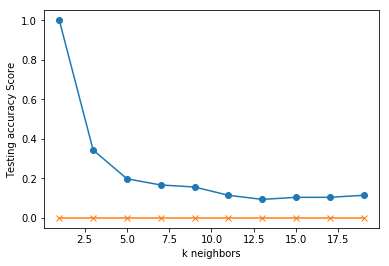

In [27]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [35]:
NCAA = NCAA_Seasons_pd.drop("team_name", axis=1)
NCAA_= NCAA.drop("seed", axis=1)
NCAA_.dtypes

season                            int64
total_wins                        int64
adj_win_perc                    float64
str_of_sched                    float64
rpi                             float64
total_field_goals_pct             int64
total_two_points_pct            float64
total_three_points_pct          float64
total_free_throws_pct           float64
total_true_shooting_pct         float64
average_rebounds                float64
average_blocks                  float64
average_turnovers               float64
average_efficiency              float64
average_fast_break_pts          float64
average_points_off_turnovers    float64
average_second_chance_pts       float64
average_minutes                 float64
average_points                  float64
dtype: object

In [36]:
#Quantifying the Regression




# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = NCAA_["total_wins"].values.reshape(-1, 1)
y = NCAA_["total_true_shooting_pct"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (64, 1) (64, 1)


In [37]:
####2### Linear Regression

Text(0, 0.5, 'total_true_shooting_pct')

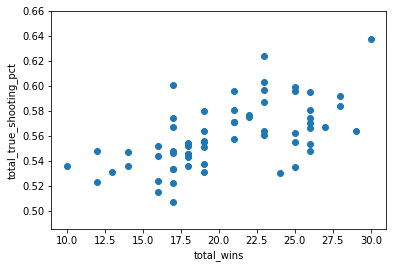

In [38]:
#Labels of Graph
plt.scatter(X, y)
plt.xlabel("total_wins")
plt.ylabel("total_true_shooting_pct")

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
model = LinearRegression()

In [41]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4076459658853494
Testing Score: 0.04625999258612101


In [42]:

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 0.0006175429292535828
R-squared (R2 ): 0.04625999258612101


In [43]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.04625999258612101